# Linear Regression Project



## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as matplot
import seaborn as sns

%matplotlib inline

sns.set(style = 'darkgrid', palette = 'muted')

import statsmodels.api as sm
from scipy import stats

In [3]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

/anaconda3/envs/Python_for_DataScience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


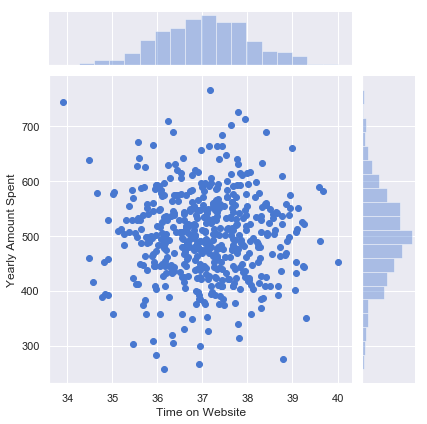

In [7]:
plot1 = sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers)

** Do the same but with the Time on App column instead. **

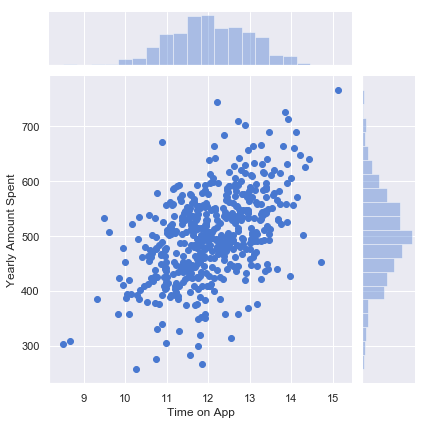

In [8]:
plot2 = sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

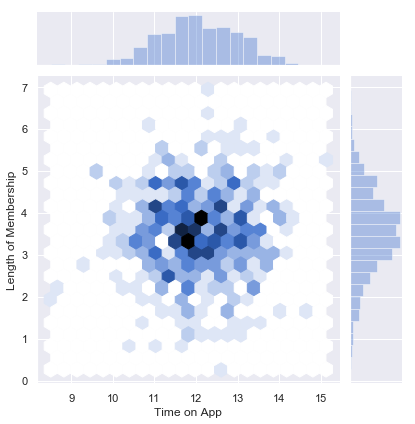

In [9]:
plot3 = sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

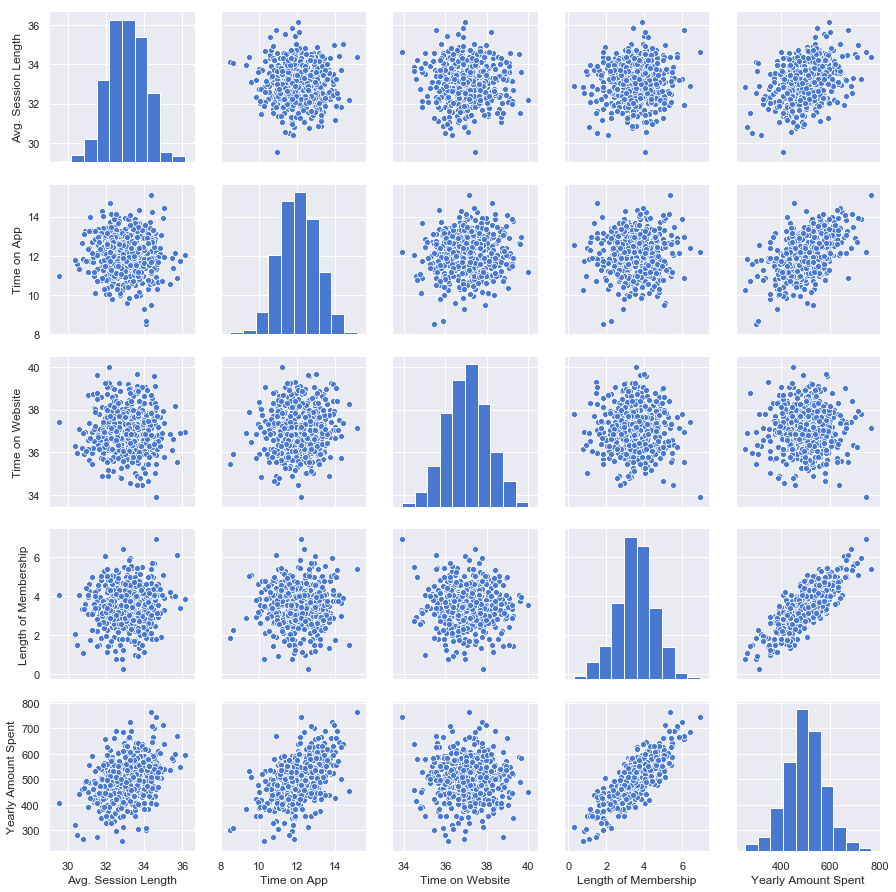

In [10]:
sns.pairplot(data = customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

<b>Length of Memebership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

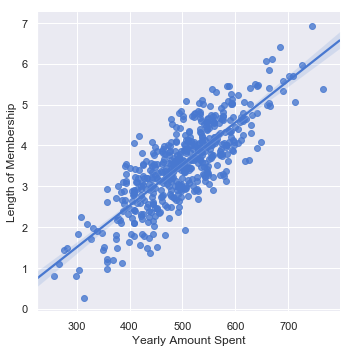

In [11]:
sns.lmplot(x = 'Yearly Amount Spent', y = 'Length of Membership', data = customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [12]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = customers[['Yearly Amount Spent']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [16]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [17]:
lm_model = LinearRegression()

** Train/fit lm on the training data.**

In [18]:
lm_model.fit(X = XTrain, y = YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [19]:
print('Coefficients: \n' + str(lm_model.coef_))
print('\n Intercept: ' + str(lm_model.intercept_))

Coefficients: 
[[25.98154972 38.59015875  0.19040528 61.27909654]]

 Intercept: [-1047.93278225]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [20]:
predicions = lm_model.predict(XTest)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0.5, 1.0, 'Scatter')

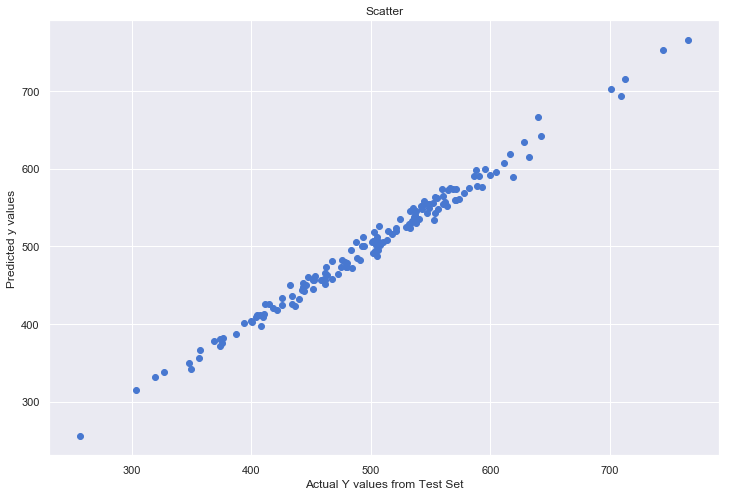

In [21]:
fig = matplot.figure(figsize = (12, 8))
matplot.scatter(x = YTest, y = predicions, cmap = 'coolwarm')
matplot.xlabel('Actual Y values from Test Set')
matplot.ylabel('Predicted y values')
matplot.title('Scatter')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [22]:
MAE = np.mean(abs(YTest - predicions))
MSE = np.mean((YTest - predicions) ** 2)
RMSE = np.sqrt(MSE)
TYV = np.mean((np.mean(YTest) - YTest) ** 2)

In [23]:
r_squared = (1 - (MSE / TYV)) * 100
print('Model evaluation metrics, \n1: MAE = {}\n2: MSE = {}\n3: RMSE = {}'.format(MAE, MSE, RMSE))
print('\n Explained variance = {}'.format(r_squared))

Model evaluation metrics, 
1: MAE = Yearly Amount Spent    7.228149
dtype: float64
2: MSE = Yearly Amount Spent    79.813052
dtype: float64
3: RMSE = Yearly Amount Spent    8.933815
dtype: float64

 Explained variance = Yearly Amount Spent    98.900462
dtype: float64


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/anaconda3/envs/Python_for_DataScience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


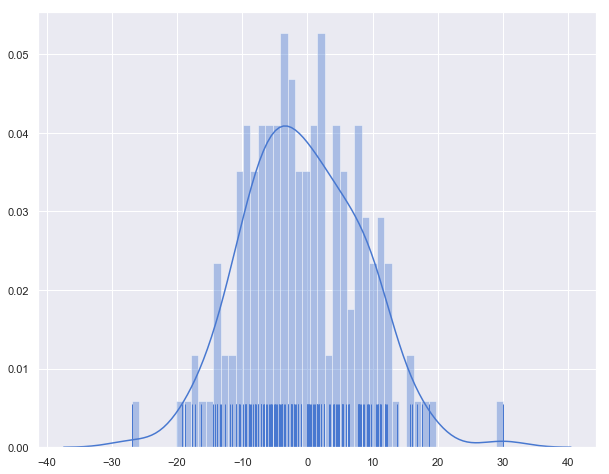

In [24]:
matplot.figure(figsize = (10, 8))
sns.distplot((YTest - predicions), bins = 50, rug = True, rug_kws = {'height': 0.1})

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [25]:
model_interpret = pd.DataFrame(data = lm_model.coef_[0], index = X.columns, columns = ['Coefficients'])
model_interpret

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
